<a href="https://colab.research.google.com/github/melodyrous/MIASHS2/blob/main/opti%26regul/03_methodes_ensembliste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Méthodes ensemblistes ☕️☕️

## Introduction

Soit $\mathcal{X}$ notre espace d'entrée et $\mathcal{Y}$ notre espace de sortie. Soit $X, Y$ deux variables aléatoires sur $\mathcal{X}$ et $\mathcal{Y}$ et soit $\mathbb{P}$ leur mesure jointe. Notre objectif est de trouver une application $h:\mathcal{X}\mapsto\mathcal{Y}$ qui minimise une certaine erreur qu'on notera $L$. N'ayant pas accès aux variables aléatoires $X$ et $Y$, nous collectons un jeu de données $S_n=\{(X_i, Y_i)\}_{i\leq n}\sim\mathbb{P}^n$ (par exemple en récupérant des images sur internet) et nous construisons un risque empirique :

$$L_n(h)=\frac{1}{n}\sum_{i}\ell(h(x_i), y_i),$$

où $\ell$ définit une erreur élémentaire (i.e. pour une unique prédiction). Comme nous l'avons vu, ce risque empirique $L_n$ est un estimateur de $L$. La fonction $h$ est ainsi construite en utilisant le jeu de données $S_n$.



## I. L'approche naïve

L'approche la plus simple lorsqu'on cherche à combiner plusieurs modèles consiste à moyenner leur prédiction. Dans le cas de la régression, la prédiction est la moyenne traditionnelle. Dans le cas de la classification, on utilisera un vote à la majorité simple.

---

Soit $\mathcal{Y}\subseteq\mathbb{R}$ l'espace des labels et $\mathcal{X}$ l'espace de nos données d'entrée. Considérons une famille de prédicteurs $\{h_j\}_{j\leq m}$, l'agrégation de ces derniers se fait de la manière la plus naïve qui soit (comme nous l'avons vu au-dessus)&nbsp;:

$$\hat{y}=\frac{1}{m}\sum_j h_j(x).$$

Supposons que nous ayons pour un prédicteur donnée $\hat{y}_{ij} = y(x_j)+\epsilon_{ij}$ où la prédiction se fait à un bruit près qui dépend de l'échantillon mais aussi du prédicteur. Nous avons évidemment la relation suivante&nbsp;:

$$\mathbb{E}\big[(\hat{y}_j(X)-y(X))^2\big]=\mathbb{E}\big[\epsilon_{j}^2\big],$$

où $\epsilon_j$ dépend de $X$. De manière similaire, si cette fois-ci nous considérons l'agrégation de nos prédicteurs, nous avons&nbsp;:

$$\mathbb{E}\big[(y(X)-\frac{1}{m}\sum_j \hat{y_j}(X))^2\big]=\mathbb{E}\big[(\frac{1}{m}\sum_j\epsilon_{j})^2\big].$$

Si on suppose (ce qui n'est pas vraiment le cas en pratique)&nbsp;:

$$\begin{aligned}
\mathbb{E}\big[\epsilon_j\big]&=0\\
\mathbb{E}\big[\epsilon_j\epsilon_k\big]&=0,\ j\neq k,
\end{aligned}$$
nous avons&nbsp;:

$$\mathbb{E}\big[(\frac{1}{m}\sum_j\epsilon_{j})^2\big]=\frac{1}{m^2}\sum_i\mathbb{E}\big[\epsilon^2\big]=\frac{1}{m}\mathbb{E}_{\bar{\epsilon}},$$

où $\mathbb{E}_{\bar{\epsilon}}$ indique l'erreur moyenne de nos prédicteurs. L'erreur diminue au fur et à mesure où on ajoute des prédicteurs.

---

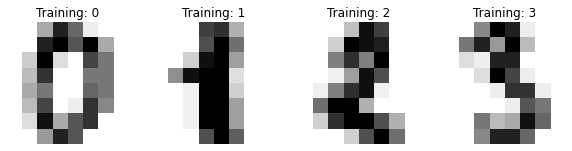

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

data = load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, data.images, data.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [ ]:
from sklearn.model_selection import train_test_split
X = data.data / data.data.max()

X_train, X_test, y_train, y_test = train_test_split(X, data.target, test_size=0.75)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from scipy import stats

In [ ]:
y_train

array([8, 6, 3, 0, 5, 7, 4, 1, 6, 6, 2, 8, 6, 0, 9, 0, 2, 5, 0, 4, 4, 2,
       1, 0, 2, 4, 0, 1, 0, 6, 2, 6, 0, 0, 2, 1, 2, 8, 8, 3, 2, 4, 0, 8,
       5, 3, 1, 3, 4, 6, 3, 7, 8, 0, 7, 0, 7, 0, 9, 4, 8, 8, 5, 0, 9, 7,
       7, 4, 4, 5, 7, 0, 8, 2, 2, 8, 3, 6, 9, 8, 0, 0, 2, 6, 9, 8, 8, 7,
       1, 8, 3, 2, 7, 5, 1, 1, 2, 0, 6, 0, 1, 2, 6, 6, 6, 1, 6, 0, 8, 4,
       0, 4, 8, 7, 5, 2, 3, 5, 6, 0, 6, 3, 7, 0, 3, 0, 2, 1, 6, 2, 5, 1,
       0, 3, 3, 2, 6, 7, 7, 2, 2, 6, 8, 8, 8, 1, 9, 0, 8, 2, 5, 5, 7, 9,
       3, 9, 0, 8, 1, 4, 5, 3, 0, 5, 6, 1, 8, 5, 7, 3, 4, 1, 1, 1, 5, 9,
       5, 5, 9, 0, 6, 8, 1, 4, 6, 5, 0, 8, 7, 8, 0, 6, 0, 6, 9, 8, 9, 9,
       8, 8, 1, 7, 1, 3, 8, 0, 7, 2, 0, 9, 4, 6, 7, 5, 9, 7, 0, 4, 9, 2,
       6, 4, 7, 9, 9, 8, 6, 2, 4, 8, 0, 4, 2, 9, 9, 4, 4, 4, 5, 7, 5, 8,
       6, 7, 6, 0, 2, 2, 5, 1, 5, 7, 8, 7, 2, 8, 9, 3, 3, 5, 6, 1, 8, 4,
       6, 9, 6, 3, 2, 1, 1, 1, 2, 8, 4, 9, 9, 6, 4, 0, 5, 3, 5, 5, 3, 0,
       6, 0, 1, 1, 3, 5, 6, 2, 6, 7, 2, 0, 8, 6, 7,

**<span style='color:blue'> Exercice</span>** 
**Complétez la méthode $\texttt{predict}$ de la classe suivante afin de faire un vote à la majorité simple pour combiner plusieurs modèles.**



 ----

In [ ]:
class MajorityVoting(object):
    def __init__(self, *models):
        self.models = models
    
    def fit(self, X, y):
        for m in self.models:
            m.fit(X, y)

    def predict(self, X):
        ####### Complete this part ######## or die ####################
        pred = np.zeros((len(self.models), X.shape[0]))
        for i, m in enumerate(self.models):
          pred[i] = m.predict(X)
        return stats.mode(pred).mode

        ###############################################################
    
    def score(self, X, y):
        scores = {'model': [], 'vote': None}
        for m in self.models:
            scores['model'].append(m.score(X, y))
        scores['vote'] = (self.predict(X) == y).astype(int).sum()/len(X)
        return scores
            
model = MajorityVoting(
    LogisticRegression(max_iter=5000), 
    DecisionTreeClassifier(),
    KNeighborsClassifier()
)
model.fit(X_train, y_train)

scores = model.score(X_test, y_test)

print('Nos modèles atteignent:', scores['model'])
print('Notre agrégation atteint:', scores['vote'])


Nos modèles atteignent: [0.9421364985163204, 0.776706231454006, 0.951780415430267]
Notre agrégation atteint: 0.9480712166172107


On peut imaginer que les modèles se trompent sur les mêmes images et non de manière aléatoire. C'est par exemple le cas si les modèles se trompent lorsqu'un chiffre est mal dessiné et ressemble à un autre chiffre : tous les modèles vont faire la même erreur. Ainsi, le meilleur modèle est le meilleur modèle et non le vote. À l'inverse, si nos différents modèles ont tendance à faire des erreurs différentes, alors l'agrégation permettant de gagner en score.

Considérons maintenant le jeu de données suivant.

In [ ]:
from sklearn.datasets import load_boston

data = load_boston()

In [ ]:
from sklearn.model_selection import train_test_split
X = data.data/data.data.max(axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, data.target, test_size=0.75)

In [ ]:
X_test.shape

(380, 13)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from scipy import stats

from sklearn.metrics import mean_squared_error

**<span style='color:blue'> Exercice</span>** 
**Complétez la méthode $\texttt{predict}$ de la classe suivante afin de faire une moyenne pour combiner plusieurs modèles.**



 ----

In [ ]:
class AverageVoting(object):
    def __init__(self, *models):
        self.models = models
    
    def fit(self, X, y):
        for m in self.models:
            m.fit(X, y)

    def predict(self, X):
        ####### Complete this part ######## or die ####################*
        pred = np.zeros((len(self.models),len(X)))
        for i, m in enumerate(self.models):
          pred[i] = m.predict(X)
        return np.mean(pred, axis=0)

        ###############################################################
    
    def score(self, X, y):
        scores = {'model': [], 'vote': None}
        for m in self.models:
            scores['model'].append(mean_squared_error(y, m.predict(X)))
        scores['vote'] = mean_squared_error(y, self.predict(X))
        return scores
            
model = AverageVoting(
    LinearRegression(), 
    DecisionTreeRegressor(),
    KNeighborsRegressor()
)
model.fit(X_train, y_train)

scores = model.score(X_test, y_test)

print('Nos modèles atteignent:', scores['model'])
print('Notre agrégation atteint:', scores['vote'])


Nos modèles atteignent: [23.42635932052333, 38.59068421052631, 33.130238947368426]
Notre agrégation atteint: 20.534940116967498


On observe cette fois-ci un gain clair des performances. Les différents modèles doivent se tromper d'une manière aléatoire et répartie autour de la moyenne. L'agrégation rend ce résultat plus stable.

Cette manière d'agréger des votes est effectives mais restent "naïve". Nous allons voir que nous pouvons formaliser tout cela dans le cadre du *framework* probabiliste.

## II. Bayesian Model Averaging

Notons $z_i=(x_i, y_i)$ et une famille de $M$ modèles probabilistes (e.g. régression logistique) où chaque modèle est noté $\mathcal{M}_j$. Notons :

$$p(y_i|x_i, \mathcal{M}_j),$$

la densité d'un point de $\mathcal{Y}$ relativement au modèle $\mathcal{M}_j$ et à une observation $x_i\in\mathcal{X}$. Notre objectif est de déterminer dans un premier temps la "qualité" d'un modèle en tenant compte de notre point de vu *a priori* ainsi que des données que nous avons pu observer $S_n$. Notons ainsi $p(\mathcal{M}_j)$ notre probabilité *a priori* sur le modèle $\mathcal{M}_j$. Celle-ci peut favoriser certaines solutions parcimonieuses ou bien être uniforme et ne favoriser aucun modèle. En appliquant la règle de Bayes, nous obtenons (modele bayesien):

$$p(\mathcal{M}_j|X, \boldsymbol{y})=\frac{p(\boldsymbol{y}|X, \mathcal{M}_j)p(\mathcal{M}_j)}{p(\boldsymbol{y}| X)},$$

où $S_n=(\boldsymbol{y}, X)$ et où nous avons : (vraissemblance)

$$p(\boldsymbol{y}|X\mathcal{M}_j)=\prod_i p(y_i|x_i, \mathcal{M}_j),$$

ainsi que : (evidence)

$$p(\boldsymbol{y}| X)=\sum_j p(\boldsymbol{y}|X, \mathcal{M}_j)p(\mathcal{M}_j).$$

Nous avons bien ici toutes les informations nous permettant d'évaluer de manière Bayésienne la qualité de nos différents modèles. Cependant, en pratique, les variations pourraient très bien dépendre d'un tirage particulier de nos données. L'idée derrière le *Bayesian Model Averaging* consiste à considérer TOUS les modèles mais à les pondérer par leur qualité. Cela ne se fait pas au doigt mouillé, mais en utilisant encore une fois le *framework* probabiliste :

$$p(y_\text{new}|x_\text{new}, S_n)=\sum_j p(y_\text{new}|x_\text{new}, \mathcal{M}_j, S_n)p(\mathcal{M}_j|S_n)$$

**Application a une famille de régression logistique.**

Dans le cas de la régression logistique, nous avons la vraisemblance suivante :

$$\mathcal{L}(\theta_j)=\prod_i p(y_i|x_i,\theta_j)$$

où

$$p(y_i|x_i, \theta_j)=\sigma_j(x_i)^y_i(1-\sigma_j(x_i))^{1-y_i}$$

et

$$\sigma_j(x)=(1+e^{-\langle\theta_j,x\rangle})^{-1}.$$

Ainsi, la *posterior* de notre modèle $\theta_j$ après avoir observé notre jeu de données est donnée par :

$$p(\theta_j|S_n)\propto \prod_i p(y_i|x_i,\theta_j)p(\theta_j),$$

où le symbole $\propto$ indique la proportionnalité.

Nous allons construire dans cette exercice un modèle de classification d'images de chiffres à partir de régressions logistiques. La particularité sera que chaque régression logistique ne verra qu'une partie de l'image tirée aléatoirement.

In [ ]:
from sklearn.datasets import load_digits
data = load_digits()

Affichons le jeu de données ainsi qu'un exemple de ce que pourrait voir un modèle.

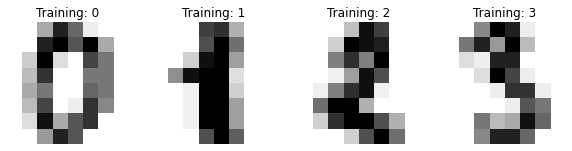

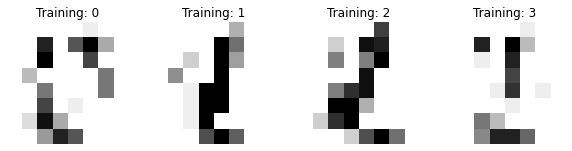

In [ ]:
import matplotlib.pyplot as plt

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, data.images, data.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

mask = np.random.binomial(n=1, p=0.4, size=data.images[0].shape).astype(bool)

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, data.images, data.target):
    ax.set_axis_off()
    ax.imshow(
        np.ma.masked_array(image, mask=mask), 
        cmap=plt.cm.gray_r, 
        interpolation='nearest'
    )
    ax.set_title('Training: %i' % label)

Construisons notre jeu d'apprentissage ainsi que notre jeu de test.

In [ ]:
from sklearn.model_selection import train_test_split
X = data.data / data.data.max()

X_train, X_test, y_train, y_test = train_test_split(X, data.target, test_size=0.75)

**<span style='color:blue'> Exercice</span>** 
**Complétez les méthodes $\texttt{posterior_}$, $\texttt{fit}$ et $\texttt{predict}$ afin de reproduire le *framework* que nous avons introduit au-dessus.**



 ----

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from scipy.special import logsumexp

In [ ]:
class BayesianLogisticAveraging(object):
    def __init__(self, dim=64, p=0.5, nb_models=50, max_iter=5000):
        self.mask = np.random.binomial(n=1, p=p, size=(nb_models, dim)).astype(bool)
        self.nb_models = nb_models
        self.models = []
        self.posterior = []
        self.prior = 1./nb_models
        self.max_iter = max_iter
        
    def posterior_(self, i, X, y):
        ####### Complete this part ######## or die ####################
        p = self.models[i].predict_proba(X)

        return np.log(p[np.arange(len(p)), y]).sum() + np.log(self.prior)
        ###############################################################
        
        
    def fit(self, X_train, y_train):
        ####### Complete this part ######## or die ####################
        for _ in range(self.nb_models):
            model = LogisticRegression(max_iter=self.max_iter)
            X = X_train[:, self.mask[_]]
            model.fit(X, y_train)
            self.models.append(model)
            self.posterior.append(
                self.posterior_(_, X, y_train)
            )
        ###############################################################
        
    def individual_scores(self, X, y):
        scores = []
        for _ in range(len(self.models)):
            scores.append(self.models[_].score(X[:, self.mask[_]], y))
        print('Best model:', np.max(scores), ':: Worst model:', np.min(scores))
            
    def predict(self, X):
        ####### Complete this part ######## or die ####################
        predictions = []
        for i, model in enumerate(self.models):
            predictions.append(
                np.log(model.predict_proba(X[:, self.mask[i]]))+self.posterior[i]
            )
        predictions = np.array(predictions)
        return logsumexp(predictions, axis=0).argmax(axis=1)
        ###############################################################
        
    def score(self, X, y):
        scores = {'model': [], 'vote': None}
        for i, m in enumerate(self.models):
            scores['model'].append(m.score(X[:, self.mask[i]], y))
        scores['vote'] = (self.predict(X) == y).astype(int).sum()/len(X)
        return scores

model = BayesianLogisticAveraging()
model.fit(X_train, y_train)

model.individual_scores(X_test, y_test)

scores = model.score(X_test, y_test)

print('Nos modèles atteignent:\n -', '\n - '.join([str(i) for i in scores['model']]))
print('Notre agrégation atteint:', scores['vote'])



Best model: 0.9206231454005934 :: Worst model: 0.7789317507418397
Nos modèles atteignent:
 - 0.8887240356083086
 - 0.9094955489614244
 - 0.887240356083086
 - 0.9102373887240356
 - 0.8954005934718101
 - 0.8954005934718101
 - 0.8093471810089021
 - 0.8716617210682492
 - 0.8894658753709199
 - 0.9065281899109793
 - 0.8501483679525222
 - 0.9065281899109793
 - 0.836053412462908
 - 0.8501483679525222
 - 0.9072700296735905
 - 0.8761127596439169
 - 0.8916913946587537
 - 0.8946587537091988
 - 0.8909495548961425
 - 0.9028189910979229
 - 0.8835311572700296
 - 0.8301186943620178
 - 0.8857566765578635
 - 0.8508902077151336
 - 0.8902077151335311
 - 0.8939169139465876
 - 0.9183976261127597
 - 0.8353115727002968
 - 0.9013353115727003
 - 0.8775964391691394
 - 0.7789317507418397
 - 0.8330860534124629
 - 0.8775964391691394
 - 0.8219584569732937
 - 0.8827893175074184
 - 0.9206231454005934
 - 0.8523738872403561
 - 0.8538575667655787
 - 0.9013353115727003
 - 0.9117210682492581
 - 0.9146884272997032
 - 0.89243

De la même manière que précédemment un gain est observé si les erreurs sont indépendantes. De plus, il est important d'avoir une bonne estimation des probabilités conditionnelles afin que la vraisemblance soit un bon indicateur de la qualité de notre modèle. Une stratégie alternative, souvent utilisée en *deep learning* consiste pour chaque prédiction à favoriser le modèle dont les scores de prédictions sont les plus élevés.

**<span style='color:blue'> Exercice</span>** 
**Complétez la méthodes $\texttt{predict}$ afin de que la prédiction choisie soit celle du modèle ayant le score de prédiction le plus élevé.**



 ----

In [ ]:
class LogisticMaxPooling(object):
    def __init__(self, dim=64, p=0.5, nb_models=50, max_iter=5000):
        self.mask = np.random.binomial(n=1, p=p, size=(nb_models, dim)).astype(bool)
        self.nb_models = nb_models
        self.models = []
        self.max_iter = max_iter
        
        
    def fit(self, X_train, y_train):
        for _ in range(self.nb_models):
            model = LogisticRegression(max_iter=self.max_iter)
            X = X_train[:, self.mask[_]]
            model.fit(X, y_train)
            self.models.append(model)
            
    def individual_scores(self, X, y):
        scores = []
        for _ in range(len(self.models)):
            scores.append(self.models[_].score(X[:, self.mask[_]], y))
        print('Best model:', np.max(scores), ':: Worst model:', np.min(scores))
            
    def predict(self, X):
        ####### Complete this part ######## or die ####################
        ...
        ...
        ...
        return ...
        ###############################################################
        
    def score(self, X, y):
        scores = {'model': [], 'vote': None}
        for i, m in enumerate(self.models):
            scores['model'].append(m.score(X[:, self.mask[i]], y))
        scores['vote'] = (self.predict(X) == y).astype(int).sum()/len(X)
        return scores

model = LogisticMaxPooling()
model.fit(X_train, y_train)
model.individual_scores(X_test, y_test)
model.predict(X_test)

scores = model.score(X_test, y_test)

print('Nos modèles atteignent:\n -', '\n - '.join([str(i) for i in scores['model']]))
print('Notre agrégation atteint:', scores['vote'])


Le principe du *Bayesian Model Averaging* se généralise bien sûr lorsqu'on a une quantité infinie de modèles et la *posterior* prédictive s'écrit :

$$p(y|x_\text{new}, S_n)=\int p(y|x_\text{new}, \mathcal{M}, S_n)p(\mathcal{M}|S_n)dM.$$

Cette stratégie demande un effort analytique cependant beaucoup plus intense. La séquence "Bayésienne linear regression" illustrera notamment cette idée dans le cas de la régression linéaire et pointera du doigt son lien avec la notion de régularisation.


## III. Bagging


La difficulté de considérer plusieurs modèles est souvent que pour une classe de modèles donnée, un même jeu d'apprentissage implique une même solution et combiner plusieurs fois la même chose ne sert à rien. L'idée du bagging est d'agréger plusieurs modèles en trouvant justement une stratégie pour créer de la variabilité entre ces derniers. L'agrégation se fait de la manière la plus naïve possible en moyennant les prédictions comme indiqué au-dessus.

La stratégie utilisée pour créer de la variabilité est de passer par un jeu de données *bootstrap*. Soit $S_n=\{(X_i, Y_i)\}_{i\leq n}$ un jeu de données de taille $n$. L'idée va être de construire $m$ nouveaux jeux de données (pour chacun de nos modèles) à partir de $S_n$ en tirant $n$ points aléatoirement dans $S_n$ **avec** remise. Ainsi, certains points apparaîtront en double, et d'autres seront absents.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

Considérons la fonction suivantes&nbsp;:

In [2]:
def f(x):
    x = x.ravel()
    return np.exp(-(x-5) ** 2) + 2 * np.exp(-(x - 7) ** 2) + np.exp(-(x + 2) ** 2)

In [3]:
def generate(n_samples, noise=0.1, n_repeat=1):
    X = np.random.rand(n_samples) * 10
    X = np.sort(X)

    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))

        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)

    X = X.reshape((n_samples, 1))

    return X, y


X_train = []
y_train = []

n_repeat=50

X_test, y_test = generate(n_samples=1000, n_repeat=n_repeat)

for i in range(n_repeat):
    X, y = generate(n_samples=50)
    X_train.append(X)
    y_train.append(y)

Nous avons vu dans la séquence sur la régression linéaire que nous pouvions décomposer notre erreur entre une composante de biais et une composante de variance&nbsp;:

$$\begin{aligned}
\mathbb{E}\big[(y-\hat{f}(x))^2\big]=\sigma^2+\text{Var}\big(\hat{f}\big)+\text{bias}(\hat{f})^2.\end{aligned}$$

L'objectif ci-dessous va être de comparer les différentes briques de notre erreur. Pour cela, nous devons trouver une stratégie pour estimer chacune de ces quantités.

**<span style='color:blue'> Question</span>** 
**À votre avis, comment estimer empiriquement l'erreur totale ainsi que chacune des briques de l'erreur totale ?**



 ----

**<span style='color:blue'> Exercice</span>** 
**Complétez le code suivant afin d'entraîner un arbre et un baggin construit à partir d'arbres et avec 100 estimateurs.**



 ----

In [4]:
####### Complete this part ######## or die ####################
estimators = {
    "Tree": DecisionTreeRegressor(),
    "Bagging": BaggingRegressor(DecisionTreeRegressor(), n_estimators=100)
}
###############################################################


# Loop over estimators to compare
for n, (name, estimator) in enumerate(estimators.items()):
    # Compute predictions
    y_predict = np.zeros((1000, n_repeat))

    for i in range(n_repeat):
        estimator.fit(X_train[i], y_train[i])
        y_predict[:, i] = estimator.predict(X_test)

    # Bias^2 + Variance + Noise decomposition of the mean squared error
    y_error = np.zeros(1000)

    for i in range(n_repeat):
        for j in range(n_repeat):
            y_error += (y_test[:, j] - y_predict[:, i]) ** 2

    y_error /= (n_repeat * n_repeat)

    y_noise = np.var(y_test, axis=1)
    y_bias = (f(X_test) - np.mean(y_predict, axis=1)) ** 2
    y_var = np.var(y_predict, axis=1)
    
    print("{0}\t: {1:.4f} (error) = {2:.4f} (bias^2) "
          " + {3:.4f} (var) + {4:.4f} (noise)".format(name,
                                                      np.mean(y_error),
                                                      np.mean(y_bias),
                                                      np.mean(y_var),
                                                      np.mean(y_noise)))


Tree	: 0.0284 (error) = 0.0006 (bias^2)  + 0.0177 (var) + 0.0099 (noise)
Bagging	: 0.0216 (error) = 0.0009 (bias^2)  + 0.0106 (var) + 0.0099 (noise)


Vous devriez constater que là où le gain d'erreur est le plus important est la variance. C'est exactement ce que nous avions préalablement anticipé.

## IV. Boosting

L'idée première derrière la méthode de *boosting* est de construire des modèles "faibles" (potentiellement à peine meilleurs que le hasard) mais complémentaires entre eux possédant ainsi de bonnes performances en tant que groupe. Nous étudierons ici la méthode *AdaBoost* (i.e. Adaptive Boosting). Soit $\mathcal{X}\subseteq\mathbb{R}^d$ et $\mathcal{Y}=\{-1, 1\}$. On ne considèrera que le cas de la classification binaire bien que le propos se généralise à d'autres tâches de *machine learning*. Notre objectif est de construire un modèle final $h$ de $\mathcal{X}$ vers $\mathcal{Y}$ en s'appuyant sur un jeu de données $S_n$. Notons $w_i^j$ le poids associé à la donnée $(x_i, y_i)$ pour le modèle faible $j$. Initialisons les poids à $w_i^j=1/n$. Notre modèle consistera en $m$ classifieurs faibles.

*AdaBoost* fonctionne de la manière suivante :

1. On initialise notre compteur $j=1$ (i.e. on considère le premier modèle)
2. On optimise notre modèle sur le jeu de données : $\sum_i w_i^j\textbf{1}\{h_j(x_i)\neq y_i\}$

3.  On calcule l'erreur normalisée : $\epsilon_j=\frac{\sum_i w_i^j\textbf{1}\{h_j(x_i)\neq y_i\}}{\sum_i w_i^j}$ et on évalue l'importance du modèle courant pour notre meta-modèle : $\alpha_j=\text{ln}\Big(\frac{1-\epsilon_j}{\epsilon_j}\Big)$
4.  On met à jour la pondération des données pour le modèle suivant : $w_i^{j+1}=w_i^j\text{exp}\big(\alpha_j \textbf{1}\{h_j(x_i)\neq y_i\}\big)$
5.  Si $j<m$, on reprend à l'étape $2$ pour optimiser le modèle suivant.

Une fois les modèles optimisés, notre *meta-classifieur* permet de faire des prédictions de la manière suivante :

$$H(x)=\text{sign}\Big(\sum_j\alpha_j h_j(x)\Big)$$

Intuitivement, on cherche à favoriser les modèles qui "fonctionnent bien" et à donner de l'importance aux exemples d'apprentissage mal classés pour que les futurs classifieurs faibles se concentrent dessus.

----

**Pourquoi ces coefficients ?**


Considérons tout d'abord la *loss* exponentielle :

$$\ell(z)=\text{exp}\big(-z\big),$$

où $z=yh(x)$, $(x, y)\in S_n$. La *loss* est affichée juste après. De manière directe, on observe que si notre modèle prédit un score dont le signe est le même que celui du label, alors la *loss* est petite et, à l'inverse, si le signe est différent, notre *loss* sera grande.

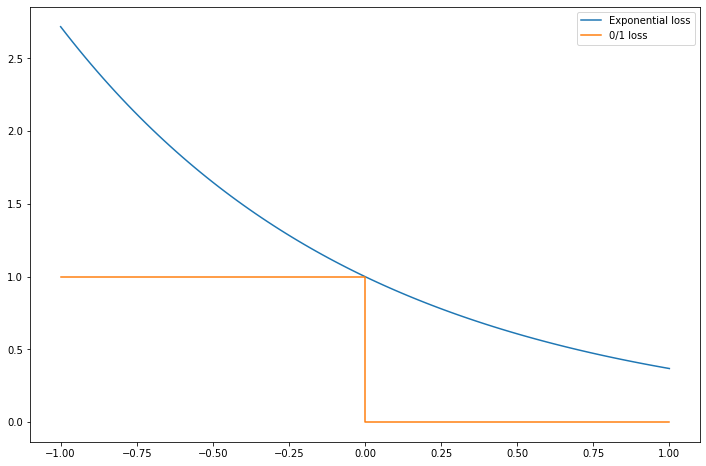

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 101)
y = np.exp(-x)

plt.figure(figsize=(12, 8))
plt.plot(x, y, label='Exponential loss')
y = (x<=0).astype(int)
x[51] = 0
plt.plot(x, y, label='0/1 loss')
plt.legend()
plt.show()

On cherche à construire un classifieur $H$ minimisant la *loss* exponentielle suivante :

$$\mathcal{L}(H)=\sum_{i=1}^n\ell(y_iH(x_i)),$$

où 

$$H(x)=\frac{1}{2}\sum_j\alpha_j h_j(x),$$

tels que $h_j$ sont nos classifieurs faibles et $\alpha_j$ les poids qui leur sont associés. Cependant, imaginons qu'au lieu de tout minimiser d'une seule fois, nous procédions itérativement, classifieur par classifieur. Ainsi, lorsqu'on optimise le classifieur $j$, tous les classifieurs $h_{1}, \ldots, h_{j-1}$ et leur poid $\alpha_1, \ldots, \alpha_{j-1}$ restent fixés. Notons $H_m(x)$ le classifieur total jusqu'au classifieur faible $h_m$. Notre *loss* se reformule ainsi :

$$\mathcal{L}_j(H)=\sum_{i=1}^n\text{exp}\Big(-y_iH_{j-1}(x_i)-\frac{1}{2}y_i\alpha_jh_j(x_i)\Big)=\sum_{i=1}^nw_i^j\text{exp}\Big(-\frac{1}{2}y_i\alpha_jh_j(x_i)\Big),$$

où $w_i^j = \text{exp}(-y_iH_{j-1}(x_i))$. Notons que si nous sommes bien entrain d'optimiser notre loss du point de vue de $h_j$ et $\alpha_j$, alors $w_i^j, \forall i$ sont des constantes. Notons $S_c^{m}$ l'ensemble des points correctement classés par $H_m$ et $S_i^m$ ceux qui à l'inverse ne le sont pas. Nous pouvons reformuler l'erreur précédente de la manière suivante :

$$\begin{aligned}
\mathcal{L}_j(H)&=e^{-\alpha_j/2}\sum_{i\in S_\mathcal{c}^j}w_i^m+e^{\alpha_j/2}\sum_{i\in S_\mathcal{i}^j}w_i^m\\
&=(e^{\alpha_j/2}-e^{-\alpha_j/2})\sum_{i=1}^nw_i^m\textbf{1}\{h_j(x_i)\neq y_i\}+e^{-\alpha_j/2}\sum_{i=1}^nw_i^m\\
&\propto (e^{\alpha_j/2}-e^{-\alpha_j/2})\sum_{i=1}^nw_i^m\textbf{1}\{h_j(x_i)\neq y_i\}
\end{aligned}$$

Du point de vu de l'optimisation de $h_j$, on remarque que cela revient à optimiser :

$$(e^{\alpha_j/2}-e^{-\alpha_j/2})\sum_{i=1}^nw_i^m\textbf{1}\{h_j(x_i)\neq y_i\},$$

où le choix de $\alpha_j$ n'a pas d'effet. Cela revient à réaliser l'étape $2$ de notre algorithme. Considérons maintenant l'optimisation de $\alpha_j$. En annulant la derivée en fonction de $\alpha_j$ on se rend compte que cela revient à le calculer comme indiqué à l'étape 3 ($\epsilon_j$ et $\alpha_j$).

----

Dans le cas de la régression, la stratégie va être de travailler sur les résidus des modèles précédents.

---
Un *stumps* est une fonction seuille. C'est une fonction qui prend une variable, et considère que toutes les données dont la valeur de cette variable est supériere (ou inférieure) à un seuil sont associées à la classe $1$ et les autres à la classe $-1$. Il s'agit tout simplement d'un arbre de profondeur $1$.



In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import AdaBoostClassifier

**<span style='color:blue'> Exercice</span>** 
**Dans le code ci-dessous, complétez les trois sections. La première consiste à construire un *stump*, à le fiter et à calculer son taux d'erreur sur le test. La seconde consiste à calculer un arbre de décision de profondeur $9$ et de nombre minimum de point par feuille à $1$, à le fitter et à calculer son taux d'erreur sur le test. Enfin, la troisième partie consiste à construire un modèle AdaBoost où le classifieur faible est un *stump*.**



 ----

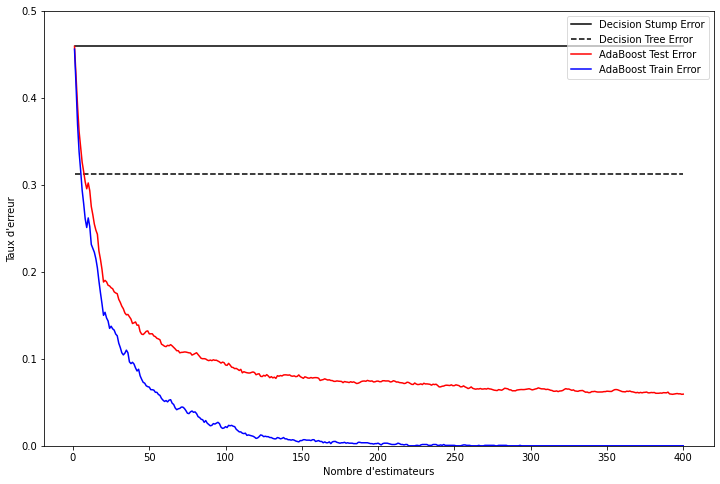

In [14]:
X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=1)

X_test, y_test = X[2000:], y[2000:]
X_train, y_train = X[:2000], y[:2000]

####### Complete this part ######## or die ####################
# ... stump instanciation
stump = DecisionTreeClassifier(max_depth=1)
y_stump = stump.fit(X_train, y_train).predict(X_test)
dt_stump_err = 1 - stump.score(X_test, y_test )
###############################################################

####### Complete this part ######## or die ####################
# ... decision tree instanciation
dt = DecisionTreeClassifier(max_depth=9, min_samples_leaf=1)
y_dt = dt.fit(X_train, y_train).predict(X_test)
dt_err = zero_one_loss(y_test, y_dt)
###############################################################


####### Complete this part ######## or die ####################
n_estimators = 400
learning_rate = 1.

# ... AdaBoost instanciation
ada =  AdaBoostClassifier(base_estimator = None, n_estimators=n_estimators, learning_rate=learning_rate)
ada.fit(X_train, y_train)
###############################################################

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ax.plot([1, n_estimators], [dt_stump_err] * 2, 'k-',
        label='Decision Stump Error')
ax.plot([1, n_estimators], [dt_err] * 2, 'k--',
        label='Decision Tree Error')

ada_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada.staged_predict(X_test)):
    ada_err[i] = zero_one_loss(y_pred, y_test)

ada_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada.staged_predict(X_train)):
    ada_err_train[i] = zero_one_loss(y_pred, y_train)

ax.plot(np.arange(n_estimators) + 1, ada_err,
        label='AdaBoost Test Error',
        color='red')
ax.plot(np.arange(n_estimators) + 1, ada_err_train,
        label='AdaBoost Train Error',
        color='blue')

ax.set_ylim((0.0, 0.5))
ax.set_xlabel('Nombre d\'estimateurs')
ax.set_ylabel('Taux d\'erreur')

leg = ax.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()


## V. Les forêts aléatoires

Vous avez vu différentes manières d'agréger plusieurs classifieurs. Vous avez également étudié les arbres de décision. Un arbre pris individuellement, sans limite de profondeur possède une dimension VC infinie. Ou, dit autrement, il possède une forte capacité à sur-apprendre. Les *forêts aléatoires* ou *random forest* définissent une stratégie permettant d'agréger des arbres de décisions complémentaires. Chacun des arbres ne peut pas avoir été appris de la même manière puisque l'apprentissage est déterministe (on aurait ainsi $M$ arbres identiques et ça n'apporterait rien).

Il existe de multiples stratégies permettant de construire des arbres différents et nous en détaillons une ici. Il existe deux angles d'attaque que nous combinerons :
* Chaque arbre ne voit pas les mêmes données,
* Chaque arbre ne voit pas les mêmes *features*.

Une stratégie d'apprentissage est donc la suivante pour un des arbres :

1.  On construit un jeu de données $S^\prime$ en tirant uniformément des points de $S$ avec remise. Une fois que $|S^\prime|=n^\prime$, on s'arrête,
2. En supposant que nous ayons $d$ variables explicatives, on tire uniformément $d^\prime$ variables dans $d$,
3. On construit l'arbre avec le jeu de données $S^\prime$ et les $d^\prime$ variables sélectionnées.

Cette opération est répétée jusqu'à ce que tous nos arbres aient été construits. Ainsi en voyant moins de *features*, nos arbres sont plus stables et leur combinaisons ayant vu des informations différentes est elle-même plus stable.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import RandomForestClassifier

**<span style='color:blue'> Exercice</span>** 
**En récupérant les résultats déjà calculés dans Boosting pour *stump* et *decision tree*, complétez le code suivant afin de construire et de fitter un *random forest* tel que la profondeur maximale de l'arbre soit $9$.**



 ----

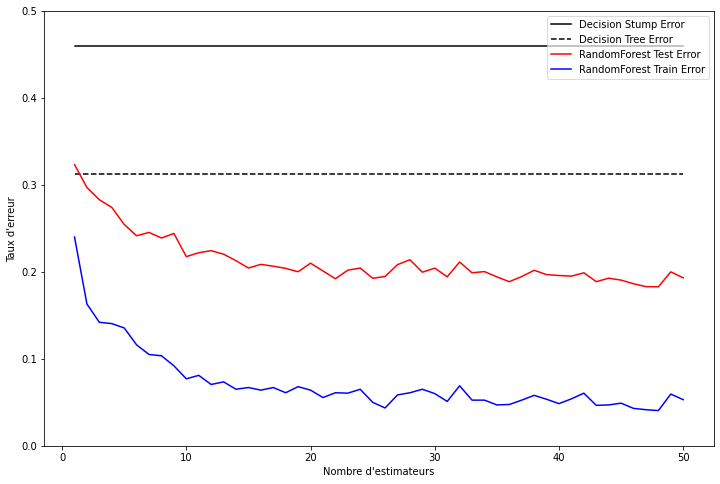

In [18]:
X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=1)

X_test, y_test = X[2000:], y[2000:]
X_train, y_train = X[:2000], y[:2000]



learning_rate = 1.

max_n_estimators = 50

n_estimators_list = np.array(
    list(range(1, max_n_estimators + 1))
)

rf_err = np.zeros((n_estimators_list.shape[0],))
rf_err_train = np.zeros((n_estimators_list.shape[0],))

for j, nb_estimators in enumerate(n_estimators_list):
    ####### Complete this part ######## or die ####################
    # ... random forest construction
    rf = RandomForestClassifier(n_estimators= nb_estimators, max_depth=9)
    rf.fit(X_train, y_train)
    ###############################################################
    rf_err[j] = zero_one_loss(rf.predict(X_test), y_test)
    rf_err_train[j] = zero_one_loss(rf.predict(X_train), y_train)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ax.plot([1, max_n_estimators], [dt_stump_err] * 2, 'k-',
        label='Decision Stump Error')
ax.plot([1, max_n_estimators], [dt_err] * 2, 'k--',
        label='Decision Tree Error')

ax.plot(n_estimators_list, rf_err,
        label='RandomForest Test Error',
        color='red')

ax.plot(n_estimators_list, rf_err_train,
        label='RandomForest Train Error',
        color='blue')

ax.set_ylim((0.0, 0.5))
ax.set_xlabel('Nombre d\'estimateurs')
ax.set_ylabel('Taux d\'erreur')

leg = ax.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()
